<a href="https://colab.research.google.com/github/zainmo11/Deutsch-and-Deutsch-Jozsa-Algorithm/blob/main/Deutsch_and_Deutsch_Jozsa_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install  qiskit
!pip install qiskit-aer
!pip install pylatexenc

# Deutsch's Algorithm

In [63]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [64]:
# f(x) = 0 (constant)
def oracle_constant_0():
    print("oracle_constant_0")
    qc = QuantumCircuit(2)
    qc.barrier()
    return qc

# f(x) = 1 (constant)
def oracle_constant_1():
    print("oracle_constant_1")
    qc = QuantumCircuit(2)
    qc.barrier()
    qc.x(1)
    qc.barrier()
    return qc

# f(x) = x (balanced)
def oracle_balanced_identity():
    print("oracle_balanced_identity")
    qc = QuantumCircuit(2)
    qc.barrier()
    qc.cx(0, 1)
    qc.barrier()
    return qc

# f(x) = NOT(x) (balanced)
def oracle_balanced_not():
    print("oracle_balanced_not")
    qc = QuantumCircuit(2)
    qc.barrier()
    qc.x(0)
    qc.cx(0, 1)
    qc.x(0)
    qc.barrier()
    return qc




In [65]:
def deutsch_algorithm(oracle_function):
    qc = QuantumCircuit(2, 1)

    # Initialize output qubit |1⟩ and apply Hadamard
    qc.x(1)
    qc.h(1)

    # Initialize input qubit |0⟩ to |+⟩
    qc.h(0)

    # Apply oracle
    qc.barrier()
    qc.compose(oracle_function(), inplace=True)
    qc.barrier()

    # Final Hadamard on input qubit
    qc.h(0)

    # Measure input qubit
    qc.measure(0, 0)

    return qc


oracle_constant_0


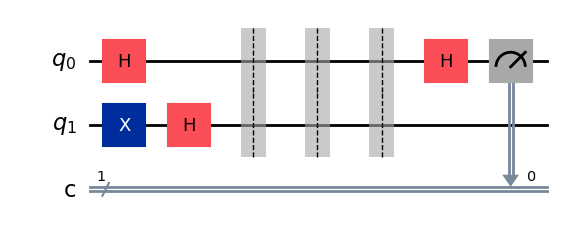

{'0': 10000}


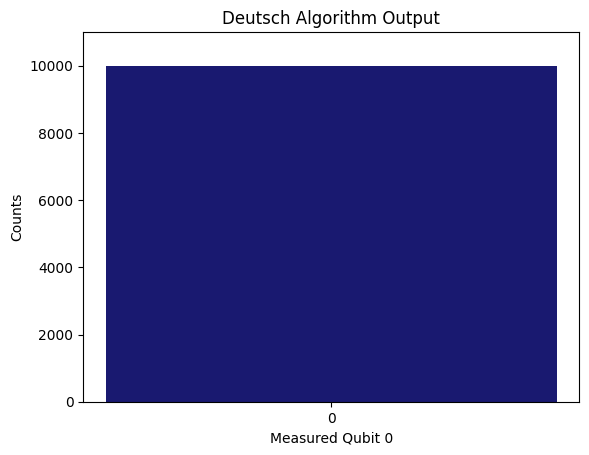

--------------------------------------------------------------------
oracle_constant_1


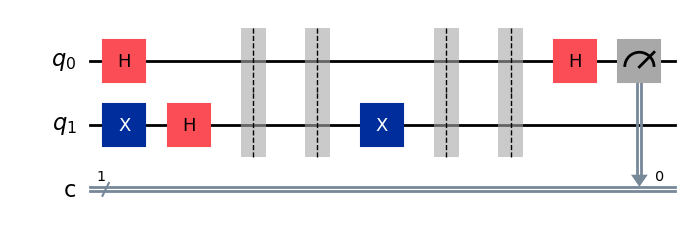

{'0': 10000}


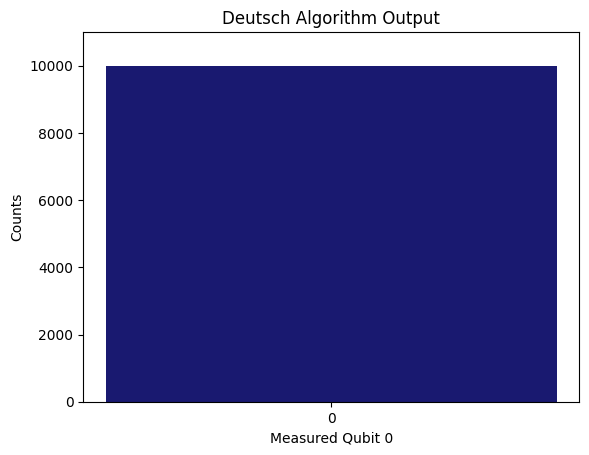

--------------------------------------------------------------------
oracle_balanced_identity


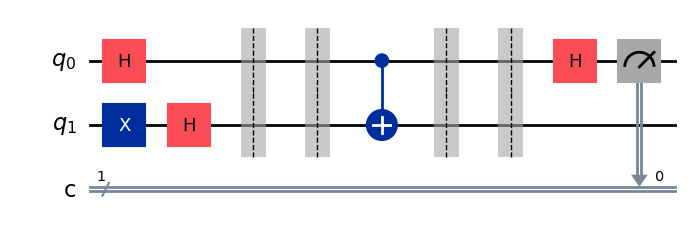

{'1': 10000}


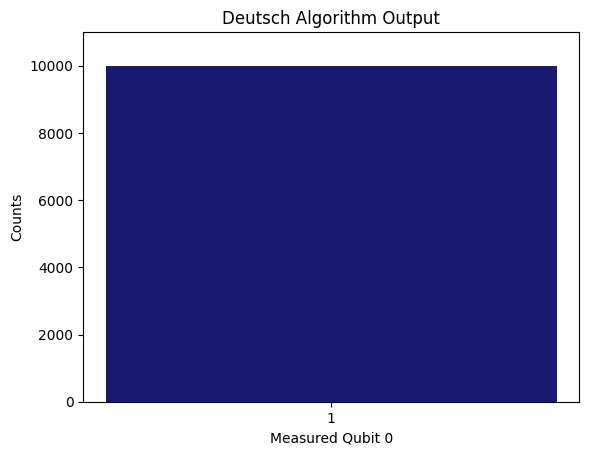

--------------------------------------------------------------------
oracle_balanced_not


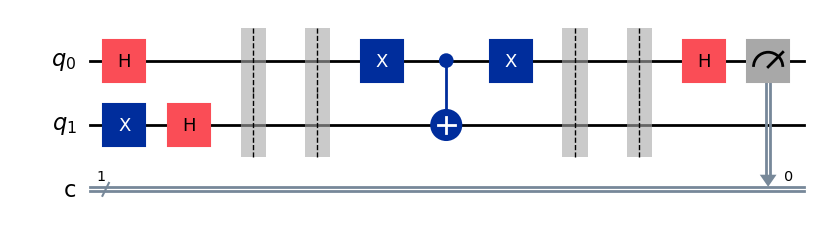

{'1': 10000}


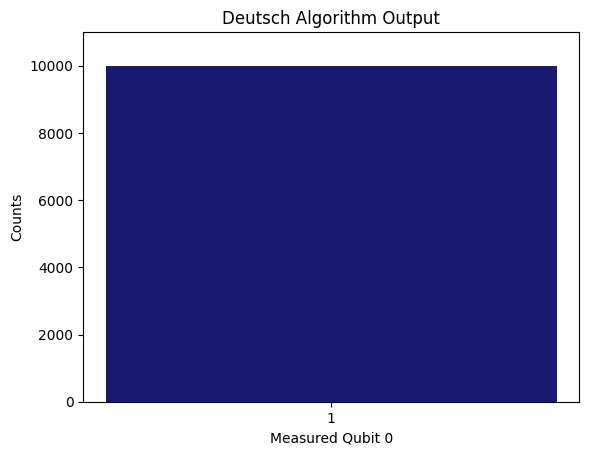

--------------------------------------------------------------------


In [66]:
# Create circuit
for oracle in [oracle_constant_0, oracle_constant_1, oracle_balanced_identity, oracle_balanced_not]:
    qc = deutsch_algorithm(oracle)
    display(qc.draw(output='mpl'))
    simulator = AerSimulator()
    job = simulator.run(qc, shots=10000)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    keys = list(counts.keys())
    values = list(counts.values())
    plt.bar(keys, values, color='midnightblue')
    plt.title("Deutsch Algorithm Output")
    plt.xlabel("Measured Qubit 0")
    plt.ylabel("Counts")
    plt.ylim(0, max(values) * 1.1)
    plt.show()
    print('--------------------------------------------------------------------')



# Deutsch-Jozsa Algorithm

In [67]:
import random
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

#f(x)=1 if first qubit is 1, if x_1=1
def balanced(n =3):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    circuit.cx(n, 0)
    circuit.barrier()
    return circuit

#f(x)=1
def constant(n=3):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    circuit.x(0)
    circuit.barrier()
    return circuit

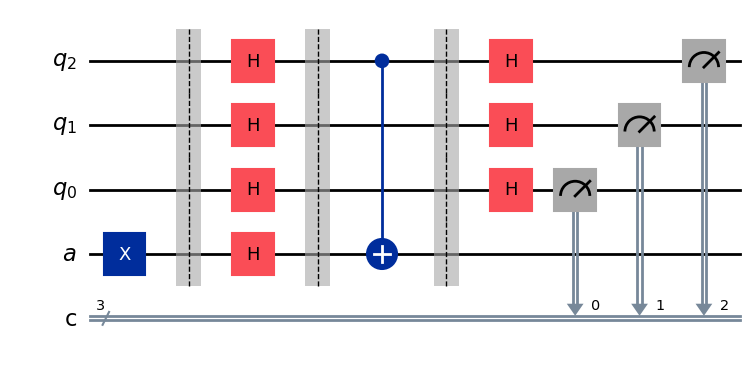

{'100': 100}


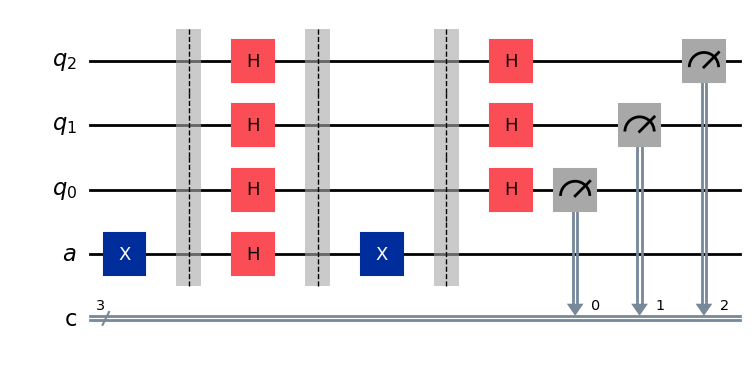

{'000': 100}


In [68]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

n= 3
for circuit in [balanced(n), constant(n)]:
    q = QuantumRegister(n, 'q')
    a = QuantumRegister(1, 'a')
    c = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(a, q, c)
    qc.x(a)
    qc.barrier()
    qc.h(q)
    qc.h(a)
    qc.compose(circuit, inplace=True)
    qc.h(q)
    qc.measure(q, c)
    display(qc.draw(output='mpl', reverse_bits= True))
    job = AerSimulator().run(qc,shots=100)
    counts = job.result().get_counts()
    print(counts)